STATISTICAL LEARNING LAB ASSIGNMENT 4
LDA and Classification Model
DIKSHANT SHARMA | 21IM30033

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
#load data
df=pd.read_csv("insurance.csv")

In [ ]:
#EDA

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 2000x4000 with 0 Axes>

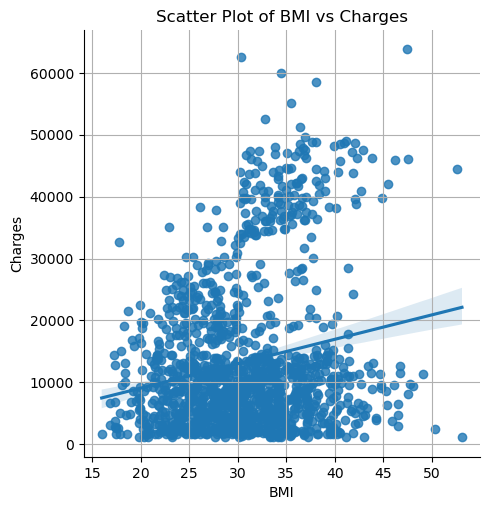

In [13]:
plt.figure(figsize=(20, 40))
sns.lmplot(data=df, x='bmi', y='charges')
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# Check for missing data
missing_data = df.isnull().sum()

# Display the count of missing data
print("Count of missing data in each column:")
print(missing_data)

Count of missing data in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


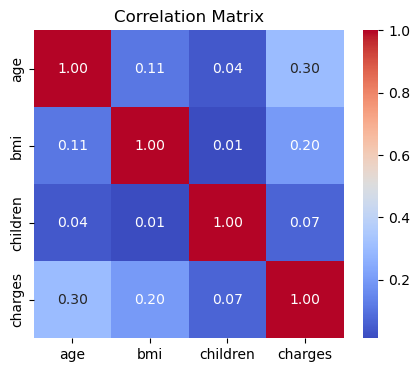

In [17]:
correlation_matrix = df.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

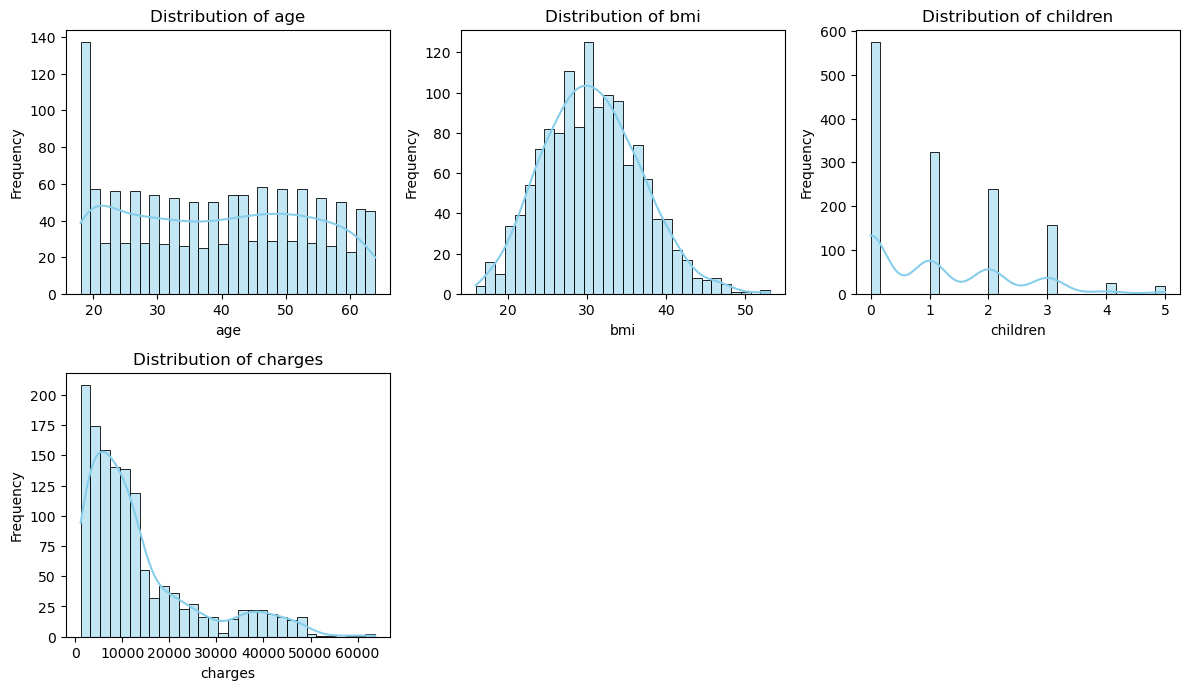

In [19]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

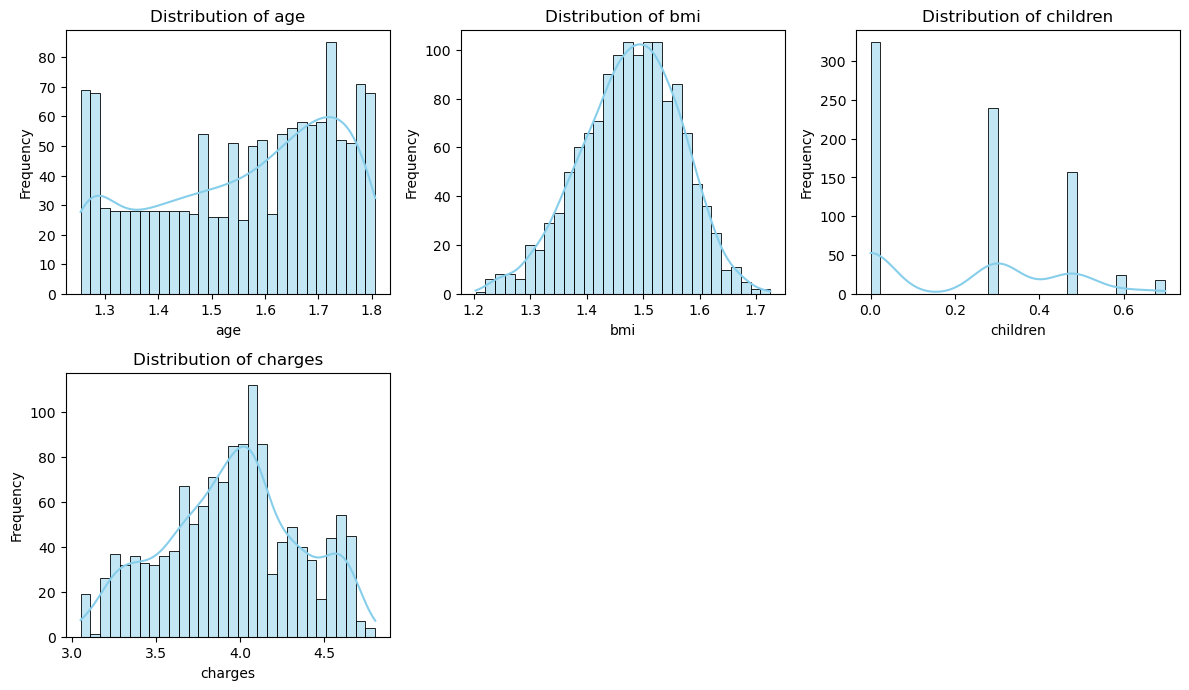

In [20]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(np.log10(df[column]), kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

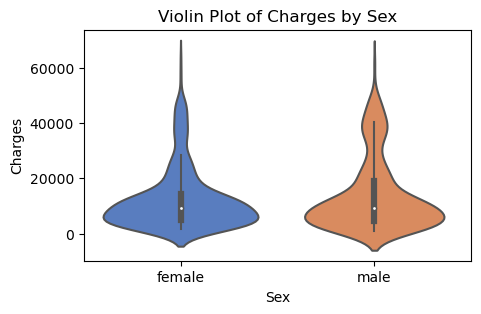

In [22]:
plt.figure(figsize=(5, 3))
sns.violinplot(x='sex', y='charges', data=df, palette='muted')
plt.title('Violin Plot of Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

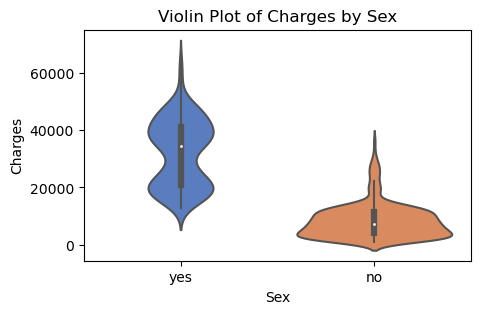

In [23]:
plt.figure(figsize=(5, 3))
sns.violinplot(x='smoker', y='charges', data=df, palette='muted')
plt.title('Violin Plot of Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

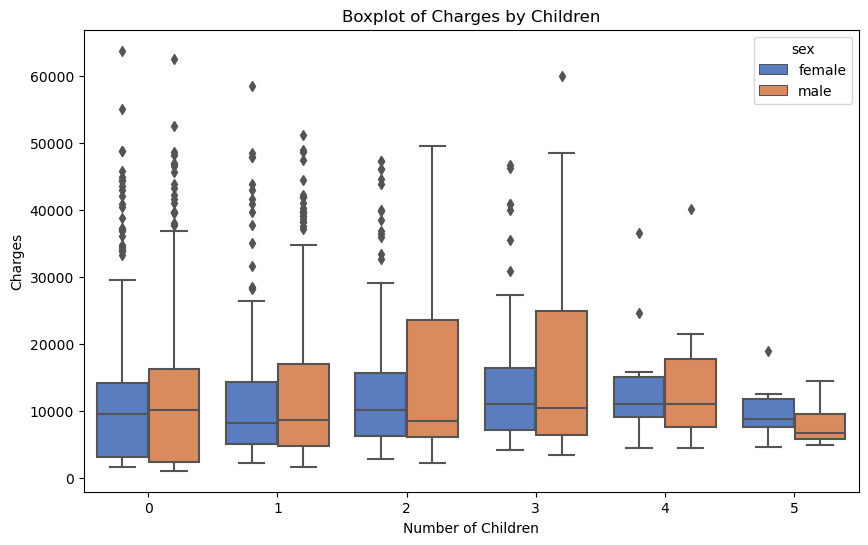

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df,hue='sex', palette='muted')
plt.title('Boxplot of Charges by Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

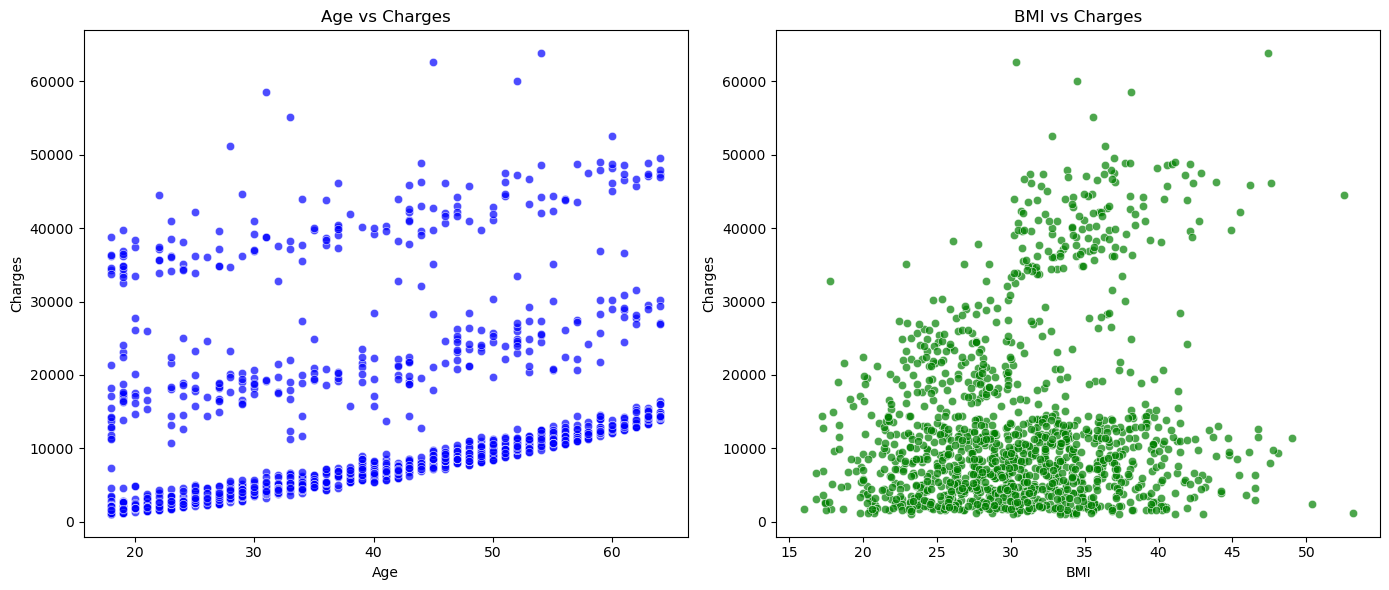

In [27]:
plt.figure(figsize=(14, 6))

# Scatterplot for Age vs Charges
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', data=df, color='blue', alpha=0.7)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Scatterplot for BMI vs Charges
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df, color='green', alpha=0.7)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

In [30]:
categorical_columns = df.select_dtypes(include=['object'])

encoded_df = pd.get_dummies(df,prefix='OHE',prefix_sep='_', columns=categorical_columns.columns)

encoded_df.head()

,age,bmi,children,charges,OHE_female,OHE_male,OHE_no,OHE_yes,OHE_northeast,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [31]:
encoded_df['charges']=np.log(encoded_df['charges'])

In [36]:
from sklearn.model_selection import train_test_split
X=encoded_df.drop('charges',axis=1)
y=encoded_df['charges']

X_train, X_test = train_test_split(X, test_size=0.3, random_state=23)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=23)

Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
coefficients=lin_reg.coef_
intercept=lin_reg.intercept_

In [39]:
coefficients_df=pd.DataFrame({'Feature':X_train.columns, 'Coefficient':coefficients})

In [40]:
coefficients_df

,Feature,Coefficient
0,age,0.033057
1,bmi,0.013706
2,children,0.101695
3,OHE_female,0.034971
4,OHE_male,-0.034971
5,OHE_no,-0.773592
6,OHE_yes,0.773592
7,OHE_northeast,0.083780
8,OHE_northwest,0.029118
9,OHE_southeast,-0.061426


In [41]:
y_pred_sk=lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
J_mse_sk=mean_squared_error(y_pred_sk,y_test)

R_squared_sk=lin_reg.score(X_test,y_test)

In [42]:
R_squared_sk

0.7767840303618614

In [43]:
J_mse_sk

0.189662350199144

In [50]:
n=len(y_test)
p=X_test.shape[1]

adjusted_r_squ=1-(1-R_squared_sk)*(n-1)/(n-p-1)

In [51]:
adjusted_r_squ

0.7704881953207856

Text(0, 0.5, 'Predicted')

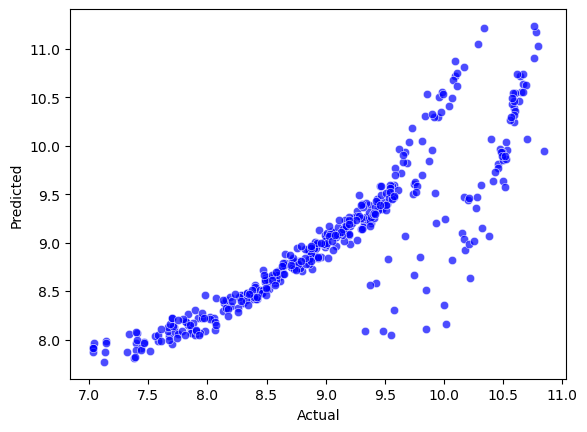

In [52]:
# plt.subplot(1, 2, 1)
sns.scatterplot(y_test,y_pred_sk, color='blue', alpha=0.7)
# plt.title('Age vs Charges')
plt.xlabel('Actual')
plt.ylabel('Predicted')

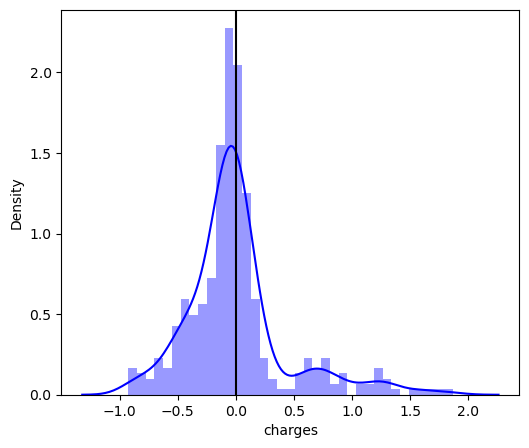

In [57]:
plt.figure(figsize=(13, 5))
ax = plt.subplot(121)
sns.distplot((y_test - y_pred_sk), ax=ax, color='b')
ax.axvline((y_test - y_pred_sk).mean(), color='k')
plt.show()

Text(0.5, 1.0, 'homoscedasticity')

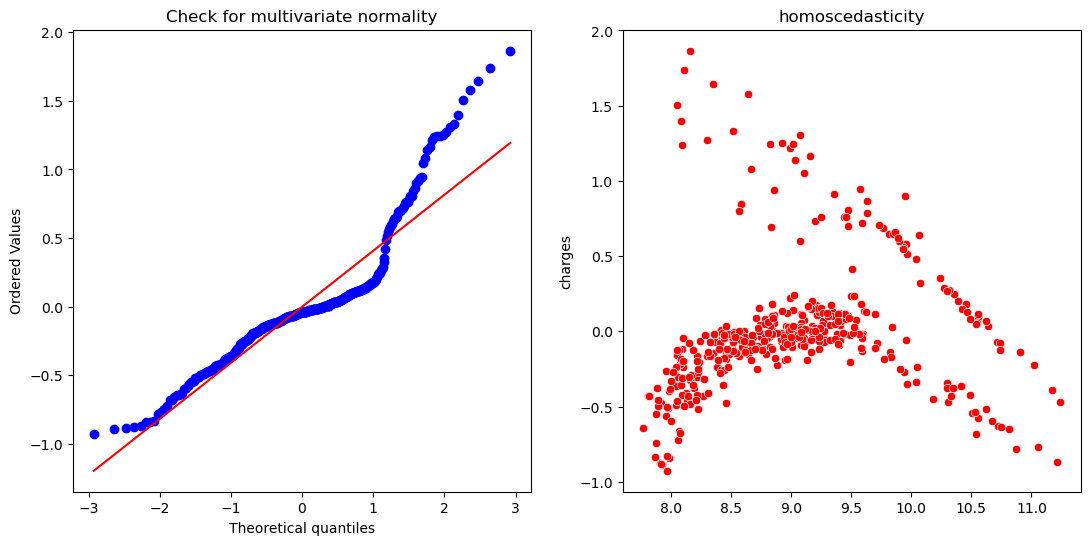

In [61]:
f,ax=plt.subplots(1,2,figsize=(13,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test-y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for multivariate normality')

sns.scatterplot(y=(y_test-y_pred_sk),x=y_pred_sk, ax=ax[1],color='r')
ax[1].set_title('homoscedasticity')

In [64]:
VIF=1/(1-R_squared_sk)

In [65]:
VIF

4.479966203229665

Logistic regression

In [67]:
df=pd.read_csv('User_Data.csv')

In [68]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [70]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [71]:
X=df.iloc[:,2:3].values
Y=df.iloc[:,4].values

In [73]:
X_train, X_test = train_test_split(X, test_size=0.25, random_state=0)
Y_train, Y_test = train_test_split(Y, test_size=0.25, random_state=0)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
Y_Pred=classifier.predict(X_test)

In [80]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_Pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



In [81]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_Pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[66  2]
 [ 8 24]]


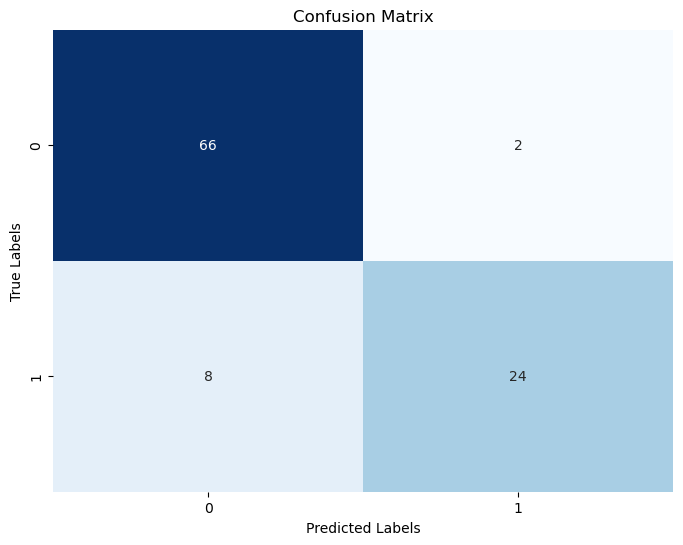

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()